In [16]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('5_ind_var_beer.csv')
df = dataset.drop(columns=['Unnamed: 0', 'ibu_Min', 'brewery_name', 'review_time'])
df['beer_abv'] *=10
df['review_overall'] *= 10
df['beer_abv'] = df['beer_abv'].astype('int64')
df['review_overall'] = df['review_overall'].astype('int64')
df.dtypes

ibu_Max           int64
beer_abv          int64
review_overall    int64
dtype: object

In [17]:
X = df.iloc[:, [1,2]].values # X must be a matrix
y = df.iloc[:, 2].values # y must be a vector

In [18]:
# Splitting into training and test sets
# Use for larger data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [19]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
# Fitting Classfier to the dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

c:\users\jcummings\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jcummings\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# predicting the new result with regression

y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([45, 45, 45, ..., 45, 40, 40], dtype=int64)

In [23]:
X_test

array([[-0.74380767,  0.92806237],
       [-0.0172083 ,  0.92806237],
       [-0.23091399,  0.92806237],
       ...,
       [-0.70106653,  0.92806237],
       [-0.14543171,  0.18086489],
       [-0.23091399,  0.18086489]])

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[    0,     1,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,   335,     0,     0,     0,   390,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,   901,     3,     0,     0,
            0],
       [    0,     0,     0,     0,     0,  2969,    46,     0,     0,
            0],
       [    0,     0,     0,     0,     0,  3558,  1712,     3,     0,
            0],
       [    0,     0,     0,     0,     0,     0, 16137,   610,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0, 33034,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0, 67556,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0, 39118,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
        10927]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

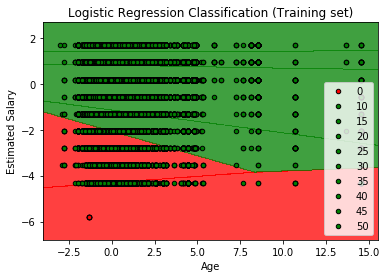

In [25]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = .01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = .01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = .75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = "black", s = 20)
plt.title("Logistic Regression Classification (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

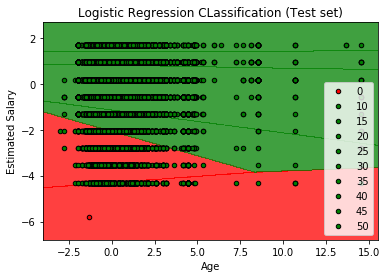

In [26]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = .01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = .01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = .75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = "black", s = 20)
plt.title("Logistic Regression CLassification (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()